<a href="https://colab.research.google.com/github/AbdulmajidMK/Hamoye-Internship-Files/blob/main/Regression_Analysys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from matplotlib.cbook import simple_linear_interpolation
import pandas as pd
import seaborn as sns

df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
#df = pd.read_csv('https://github.com/rahulgundre/HDSCWINTER-22_Premier-project/blob/0ece1cf1faac37a132cf7a0648427b65deca9071/e-finance%20dataset.csv')

column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

#Renaming Colums
df = df.rename(columns=column_names)
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Simple Linear Regression

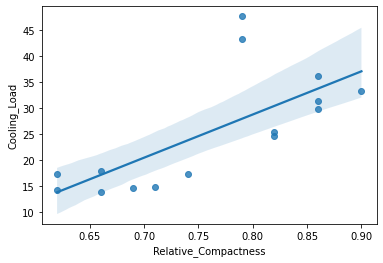

In [5]:
#selecting a data sample
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)
sns.regplot(x='Relative_Compactness', y='Cooling_Load', data=simple_linear_reg_df)

Measuring Regression Performance

In [6]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']
heating_target

0      0.257212
1      0.257212
2      0.257212
3      0.257212
4      0.399838
         ...   
763    0.320032
764    0.283904
765    0.281208
766    0.282286
767    0.286600
Name: Heating_Load, Length: 768, dtype: float64

Slitting DataSet into Training test and Testing test

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)
linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)

#obtain predictions
predicted_values = linear_model.predict(x_test)
predicted_values

array([0.17858887, 0.5814209 , 0.75366211, 0.71948242, 0.76416016,
       0.24719238, 0.16015625, 0.61010742, 0.25488281, 0.54199219,
       0.32104492, 0.66760254, 0.69421387, 0.30761719, 0.18518066,
       0.7166748 , 0.56555176, 0.31433105, 0.25610352, 0.74621582,
       0.69812012, 0.06054688, 0.60241699, 0.32666016, 0.22216797,
       0.75842285, 0.34033203, 0.17382812, 0.80944824, 0.26831055,
       0.69238281, 0.74975586, 0.13537598, 0.28466797, 0.55444336,
       0.81237793, 0.3371582 , 0.13256836, 0.72045898, 0.25305176,
       0.82666016, 0.14782715, 0.10021973, 0.15441895, 0.10961914,
       0.14770508, 0.48364258, 0.68847656, 0.75939941, 0.72338867,
       0.09716797, 0.67138672, 0.08752441, 0.24841309, 0.77172852,
       0.77648926, 0.7479248 , 0.62817383, 0.14575195, 0.30285645,
       0.17773438, 0.59765625, 0.59863281, 0.77075195, 0.56835938,
       0.92895508, 0.68664551, 0.32006836, 0.67614746, 0.23486328,
       0.54492188, 0.24755859, 0.23181152, 0.72851562, 0.28369

Metrices for Measuring Regression persformance

In [11]:
#Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

In [12]:
#Residual Sum of Squares (RSS)
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

1.823

In [13]:
#Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.089

In [14]:
#R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3) 

0.893

Penalization Methods

In [16]:
#Ridge Regression

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [17]:
#Lasso Regression

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)


Lasso(alpha=0.001)

Feature Selection for effective model tunning

In [26]:
#comparing the effects of regularisation

def get_weights_df(linear_model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(linear_model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Surface_Area,-6.387091e+12,-0.062275,0.000000
1,Relative_Compactness,-6.064125e-01,-0.283471,-0.027719
2,Orientation,-2.822876e-03,0.003369,0.000000
3,Glazing_Area_Distribution,1.913548e-02,0.029088,0.021431
4,Glazing_Area,2.295933e-01,0.212449,0.206132
5,Overall_Height,3.852539e-01,0.442467,0.463482
6,Wall_Area,3.725803e+12,0.103061,0.200087
7,Roof_Area,4.790318e+12,-0.163192,-0.000000
